# Define Functions

### Libraries

In [1]:
import sqlalchemy as sql
import pandas as pd
from fbprophet import Prophet

## Information from Database

In [2]:
#Database Connection String
database_connection_string = 'sqlite:///Resources/tourism_data.db'
#Create Engine
engine = sql.create_engine(database_connection_string)

In [3]:
sql_query = """
SELECT ds,y FROM tourism_data
WHERE Country = 'Portugal'
"""

In [4]:
df = pd.read_sql_query(sql_query,engine)
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      244 non-null    datetime64[ns]
 1   y       244 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


In [5]:
df_nopandemic = df.copy()
df_nopandemic.loc[(df_nopandemic['ds'] > '2020-03-01') & (df_nopandemic['ds'] < '2022-01-01'),'y'] = None

In [6]:
model = Prophet()

In [7]:
model.fit(df_nopandemic)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
df_future = model.make_future_dataframe(periods=24, freq='M')

In [9]:
forecast_data = model.predict(df_future)

In [10]:
forecast_data.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
263,2023-12-31,4.669773e+06,2.891178e+06,3.797529e+06,4.648395e+06,4.692999e+06,-1.342345e+06,-1.342345e+06,-1.342345e+06,-1.342345e+06,-1.342345e+06,-1.342345e+06,0.0,0.0,0.0,3.327428e+06
264,2024-01-31,4.684623e+06,2.812985e+06,3.804257e+06,4.661424e+06,4.709393e+06,-1.359224e+06,-1.359224e+06,-1.359224e+06,-1.359224e+06,-1.359224e+06,-1.359224e+06,0.0,0.0,0.0,3.325399e+06
265,2024-02-29,4.698515e+06,3.109436e+06,4.068785e+06,4.673524e+06,4.725380e+06,-1.101378e+06,-1.101378e+06,-1.101378e+06,-1.101378e+06,-1.101378e+06,-1.101378e+06,0.0,0.0,0.0,3.597137e+06
266,2024-03-31,4.713364e+06,3.739550e+06,4.756520e+06,4.687182e+06,4.742188e+06,-4.588191e+05,-4.588191e+05,-4.588191e+05,-4.588191e+05,-4.588191e+05,-4.588191e+05,0.0,0.0,0.0,4.254545e+06
267,2024-04-30,4.727735e+06,4.231532e+06,5.181402e+06,4.699440e+06,4.758114e+06,-1.436881e+04,-1.436881e+04,-1.436881e+04,-1.436881e+04,-1.436881e+04,-1.436881e+04,0.0,0.0,0.0,4.713366e+06


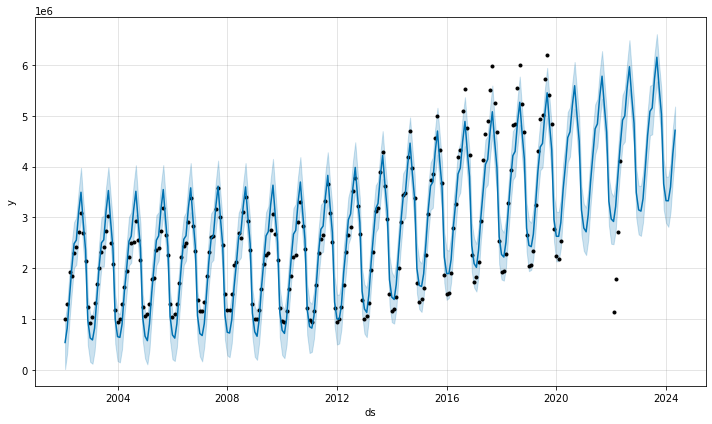

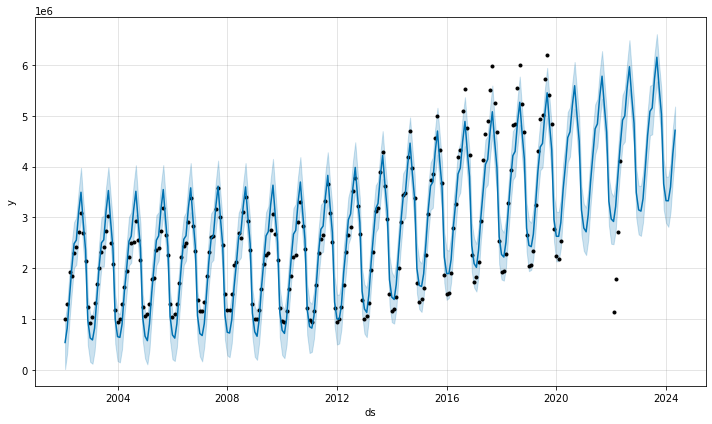

In [11]:
model.plot(forecast_data)

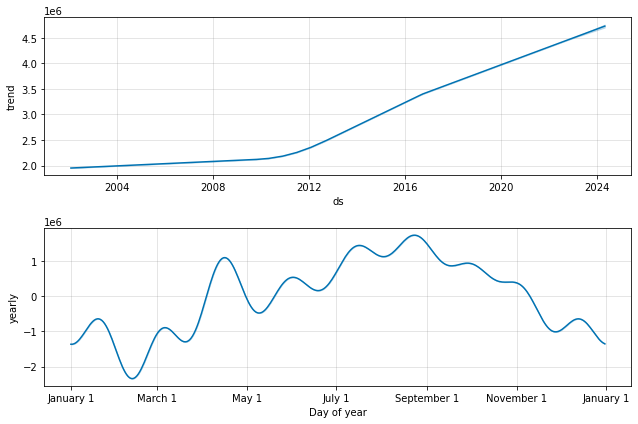

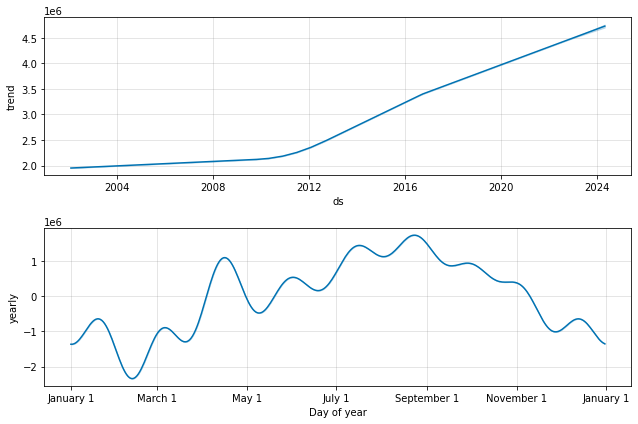

In [12]:
model.plot_components(forecast_data)